# The easiest assignment in this course

Cope one of these notebooks (`Linear SoftMax Classifier.ipynb`, `Polynomial SoftMax Classifier.ipynb`) and replace the model with multilayer neural network. Play with nonlinearities, also generate your own, more entangled data and check your models perfrmance. Good luck!

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import time
from IPython.display import clear_output

In [2]:
import tensorflow as tf

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


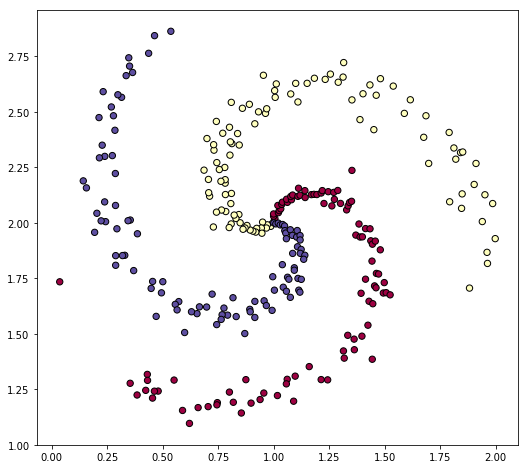

In [3]:



N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
X[:, 0] += 1
X[:, 1] += 2
# lets visualize the data:
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolors="black")
ax = plt.gca()
ax.set_aspect("equal")
plt.show()

In [4]:
def plot(h=0.02):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                 np.arange(y_min, y_max, h))
    Z = sess.run(t_prediction, feed_dict={t_x: np.column_stack([xx.ravel(), yy.ravel()])})
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10,8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolors="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.gca().set_aspect("equal")
    plt.show()

### Neaural Network

In [38]:
input_X = tf.placeholder(tf.float32, shape = [None, 2], name = 'inputs')
target_y = tf.placeholder(tf.int32, shape = [None], name = 'target')
l1 = tf.layers.dense(input_X, units = 20, activation = tf.nn.relu)
l2 = tf.layers.dense(l1, units = 3, activation = None)
l_out = tf.nn.softmax(l2, name = 'predict_proba')
y_predicted = tf.argmax(l2, axis = 1)
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
    labels=target_y, logits=l2, name="softmax_loss"))
accuracy, update_accuracy = tf.metrics.accuracy(target_y, y_predicted)
train_step = optimzer.minimize(loss)

In [47]:
optimzer = tf.train.AdamOptimizer(learning_rate=0.001)

In [39]:
def iterate_minibatches(inputs, targets, batchsize):
    assert len(inputs) == len(targets)
    indices = np.arange(len(inputs))
    np.random.shuffle(indices)
    for start_idx in range(0, len(inputs) - batchsize + 1, batchsize):
        excerpt = indices[start_idx:start_idx + batchsize]
        yield inputs[excerpt], targets[excerpt]

In [48]:
import time

num_epochs = 1000 # amount of passes through the data

batch_size = 50 # number of samples processed at each function call

#sess = tf.Session()
# initialize global wariables
#sess.run(tf.global_variables_initializer())

for epoch in range(num_epochs):
    # In each epoch, we do a full pass over the training data:
    train_err = 0
    train_batches = 0
    start_time = time.time()

    sess.run(tf.local_variables_initializer())
    for batch in iterate_minibatches(X, y,batch_size):
        inputs, targets = batch

        _, train_err_batch, _ = sess.run(
            [train_step, loss, update_accuracy],
            feed_dict={input_X: inputs, target_y:targets}
        )
        train_err += train_err_batch
        train_batches += 1
    train_acc = sess.run(accuracy)

    # Then we print the results for this epoch:
    print("Epoch {} of {} took {:.3f}s".format(
        epoch + 1, num_epochs, time.time() - start_time))

    print("  training loss (in-iteration):\t\t{:.6f}".format(train_err / train_batches))
    print("  train accuracy:\t\t{:.2f} %".format(
        train_acc * 100))
        

Epoch 1 of 1000 took 0.253s
  training loss (in-iteration):		0.175072
  train accuracy:		95.33 %
Epoch 2 of 1000 took 0.246s
  training loss (in-iteration):		0.174342
  train accuracy:		95.67 %
Epoch 3 of 1000 took 0.261s
  training loss (in-iteration):		0.173865
  train accuracy:		96.00 %
Epoch 4 of 1000 took 0.253s
  training loss (in-iteration):		0.182672
  train accuracy:		94.67 %
Epoch 5 of 1000 took 0.258s
  training loss (in-iteration):		0.188708
  train accuracy:		93.33 %
Epoch 6 of 1000 took 0.253s
  training loss (in-iteration):		0.194954
  train accuracy:		93.00 %
Epoch 7 of 1000 took 0.239s
  training loss (in-iteration):		0.191449
  train accuracy:		94.33 %
Epoch 8 of 1000 took 0.269s
  training loss (in-iteration):		0.180474
  train accuracy:		95.33 %
Epoch 9 of 1000 took 0.249s
  training loss (in-iteration):		0.176648
  train accuracy:		95.00 %
Epoch 10 of 1000 took 0.248s
  training loss (in-iteration):		0.173067
  train accuracy:		95.33 %
Epoch 11 of 1000 took 0.288s


Epoch 85 of 1000 took 0.284s
  training loss (in-iteration):		0.164783
  train accuracy:		95.67 %
Epoch 86 of 1000 took 0.267s
  training loss (in-iteration):		0.153109
  train accuracy:		94.67 %
Epoch 87 of 1000 took 0.281s
  training loss (in-iteration):		0.150152
  train accuracy:		95.00 %
Epoch 88 of 1000 took 0.275s
  training loss (in-iteration):		0.163147
  train accuracy:		95.67 %
Epoch 89 of 1000 took 0.276s
  training loss (in-iteration):		0.154219
  train accuracy:		96.00 %
Epoch 90 of 1000 took 0.285s
  training loss (in-iteration):		0.152137
  train accuracy:		97.00 %
Epoch 91 of 1000 took 0.266s
  training loss (in-iteration):		0.157983
  train accuracy:		94.33 %
Epoch 92 of 1000 took 0.266s
  training loss (in-iteration):		0.153135
  train accuracy:		95.67 %
Epoch 93 of 1000 took 0.296s
  training loss (in-iteration):		0.151230
  train accuracy:		96.33 %
Epoch 94 of 1000 took 0.274s
  training loss (in-iteration):		0.157345
  train accuracy:		95.33 %
Epoch 95 of 1000 too

Epoch 168 of 1000 took 0.292s
  training loss (in-iteration):		0.124684
  train accuracy:		96.33 %
Epoch 169 of 1000 took 0.294s
  training loss (in-iteration):		0.121376
  train accuracy:		95.33 %
Epoch 170 of 1000 took 0.283s
  training loss (in-iteration):		0.120612
  train accuracy:		95.67 %
Epoch 171 of 1000 took 0.281s
  training loss (in-iteration):		0.125958
  train accuracy:		96.00 %
Epoch 172 of 1000 took 0.283s
  training loss (in-iteration):		0.120392
  train accuracy:		96.00 %
Epoch 173 of 1000 took 0.282s
  training loss (in-iteration):		0.117989
  train accuracy:		95.67 %
Epoch 174 of 1000 took 0.286s
  training loss (in-iteration):		0.119658
  train accuracy:		96.00 %
Epoch 175 of 1000 took 0.282s
  training loss (in-iteration):		0.120889
  train accuracy:		96.00 %
Epoch 176 of 1000 took 0.277s
  training loss (in-iteration):		0.117300
  train accuracy:		96.00 %
Epoch 177 of 1000 took 0.270s
  training loss (in-iteration):		0.125406
  train accuracy:		95.67 %
Epoch 178 

KeyboardInterrupt: 

In [ ]:
X.dtype

In [ ]:
tf.layers.dropout()